In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Read CSV, Retrieve data

In [ ]:
df = pd.read_excel("/gdrive/MyDrive/DhanyaMa'am/MODEL DATA.xlsx")
df.columns = ["Sno","Mark","Cement","FlyAsh","GGBS","RHA","SilicaFume","Mica","Feldspar","CalcinatedKaolin","Metakolin","GPP","RW","EW","W/B","SuperPlast","Sand","NaOH","NaSil","SC"]

In [ ]:
features_og = df[["Cement","FlyAsh","GGBS","RHA","SilicaFume","Mica","Feldspar","CalcinatedKaolin","Metakolin","GPP","RW","EW","W/B","SuperPlast","Sand","NaOH","NaSil"]]
labels = df["SC"]

In [ ]:
features_og[:5]

,Cement,FlyAsh,GGBS,RHA,SilicaFume,Mica,Feldspar,CalcinatedKaolin,Metakolin,GPP,RW,EW,W/B,SuperPlast,Sand,NaOH,NaSil
0,624.00,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.45,0.2,936.00,0.0,0.0
1,623.13,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.45,0.4,934.69,0.0,0.0
2,623.13,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.45,0.6,934.69,0.0,0.0
3,623.13,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.45,0.8,934.69,0.0,0.0
4,623.13,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.45,1.0,934.69,0.0,0.0


In [ ]:
labels[:5]

0    0.000118
1    0.008908
2    0.010736
3    0.000371
4    0.015622
Name: SC, dtype: float64

In [ ]:
features_og = np.array(features_og)
labels = np.array(labels)
features_norma = np.zeros(np.shape(features_og))
for i in range(np.shape(features_og)[1]):
    features_norma[:,i] = features_og[:,i]/np.linalg.norm(features_og[:,i])

In [ ]:
features_og[:5]

array([[6.2400e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.5000e-01, 2.0000e-01, 9.3600e+02,
        0.0000e+00, 0.0000e+00],
       [6.2313e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.5000e-01, 4.0000e-01, 9.3469e+02,
        0.0000e+00, 0.0000e+00],
       [6.2313e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.5000e-01, 6.0000e-01, 9.3469e+02,
        0.0000e+00, 0.0000e+00],
       [6.2313e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.5000e-01, 8.0000e-01, 9.3469e+02,
        0.0000e+00, 0.0000e+00],
       [6.2313e+02, 0.0000e+00, 0.0000e+00, 0.0000e+

In [ ]:
features_norma[:5]

array([[0.11122122, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10009223, 0.01913248, 0.07622848,
        0.        , 0.        ],
       [0.11106615, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10009223, 0.03826495, 0.0761218 ,
        0.        , 0.        ],
       [0.11106615, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10009223, 0.05739743, 0.0761218 ,
        0.        , 0.        ],
       [0.11106615, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10009223, 0.07652991, 0.0761218 ,
        0.        , 0.        ],
       [0.11106615, 0.        , 0.        , 0.      

In [ ]:
labels[:5]

array([0.00011826, 0.00890788, 0.01073617, 0.00037064, 0.01562244])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features_norma,labels,test_size=0.1,random_state = 42)
#num_samp = 31
#x_train,x_test,y_train,y_test = features[num_samp:],features[:num_samp],labels[num_samp:],labels[:num_samp]

In [ ]:
np.shape(x_train),np.shape(x_test),np.shape(y_train),np.shape(y_test)

((105, 17), (12, 17), (105,), (12,))

## ML Models

##### 1) SVR
##### 2) Random Forest
##### 3) Linear Regressor
##### 4) Lasso

## 1) Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel='rbf',gamma='auto')
sv_regressor.fit(x_train, y_train)

SVR(gamma='auto')

In [ ]:
sv_regressor.score(x_test,y_test)

-0.0854240994638149

In [ ]:
svr_pred = sv_regressor.predict(x_test)
print(svr_pred)

[0.02979853 0.02979853 0.02979853 0.02979853 0.02979853 0.02979853
 0.02979853 0.02979853 0.02979853 0.02979853 0.02979853 0.02979853]


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error
r2_score(y_test,svr_pred)

-0.0854240994638149

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,svr_pred)

0.012435514247680107

Text(0.5, 1.0, 'Support Vector Regression')

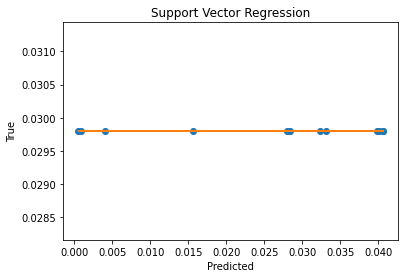

In [ ]:
plt.plot(y_test,svr_pred,'o')
m,b = np.polyfit(y_test,svr_pred,1)
plt.plot(y_test,m*y_test+b)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Support Vector Regression")

## 2) Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rf_pred = rf_regressor.predict(x_test)
rf_pred

array([0.032789  , 0.01502662, 0.035807  , 0.036949  , 0.00121255,
       0.039704  , 0.028885  , 0.044782  , 0.032849  , 0.0035376 ,
       0.036307  , 0.00117452])

In [ ]:
print("Regression :",rf_regressor.score(x_test,y_test))

Regression : 0.9725508073231794


In [ ]:
mean_absolute_error(y_test,rf_pred)

0.0019276175141898168

Text(0.5, 1.0, 'Random Forest Regressor')

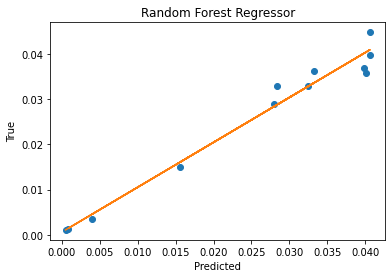

In [ ]:
plt.plot(y_test,rf_pred,'o')
m,b = np.polyfit(y_test,rf_pred,1)
plt.plot(y_test,m*y_test + b)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")

## 3) Linear Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Regression coefficient:",lin_regressor.score(x_test,y_test))
linear_pred = lin_regressor.predict(x_test)

Regression coefficient: 0.8808487073883556


In [ ]:
mean_absolute_error(y_test,linear_pred)

0.004287003645629576

Text(0.5, 1.0, 'Linear Regression')

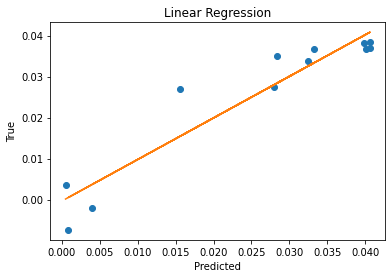

In [ ]:
plt.plot(y_test,linear_pred,'o')
m,b = np.polyfit(y_test,linear_pred,1)
plt.plot(y_test,m*y_test+b)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Linear Regression")

## 4) Lasso Regressor

In [ ]:
from sklearn.linear_model import LassoCV
lasso_reg = LassoCV(alphas = None, cv = 5, max_iter = 1000, normalize = True)
lasso_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


LassoCV(cv=5, normalize=True)

In [ ]:
print("Regression coefficient:",lasso_reg.score(x_test,y_test))
lasso_pred = lasso_reg.predict(x_test)

Regression coefficient: 0.8534864559601932


In [ ]:
mean_absolute_error(y_test,lasso_pred)

0.0052128281555949675

Text(0.5, 1.0, 'Lasso Regression')

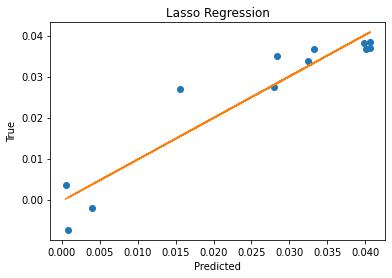

In [ ]:
plt.plot(y_test,linear_pred,'o')
m,b = np.polyfit(y_test,linear_pred,1)
plt.plot(y_test,m*y_test+b)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Lasso Regression")

## 5) Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV
alphas = 10**np.linspace(-20,20,10000)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True) #Cross Validation to find best Fit alpha
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


0.01029915009684966

In [ ]:
print("Regression coefficient:",ridgecv.score(x_test,y_test))
ridge_pred = ridgecv.predict(x_test)

Regression coefficient: 0.8694127317532794


In [ ]:
mean_absolute_error(y_test,ridge_pred)

0.004629343602480563

Text(0.5, 1.0, 'Ridge Regression')

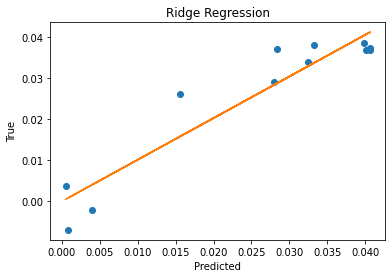

In [ ]:
plt.plot(y_test,ridge_pred,'o')
m,b = np.polyfit(y_test,ridge_pred,1)
plt.plot(y_test,m*y_test+b)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Ridge Regression")

## 6) Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNetCV
en_reg = ElasticNetCV(alphas = None, cv = 10, max_iter = 1000, normalize = True)
en_reg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


ElasticNetCV(cv=10, normalize=True)

In [ ]:
print("Regression coefficient:",en_reg.score(x_test,y_test))
en_reg_pred = en_reg.predict(x_test)

Regression coefficient: 0.8687414116825939


In [ ]:
mean_absolute_error(y_test,en_reg_pred)

0.004634198041564293

Text(0.5, 1.0, 'Elastic Net Regression')

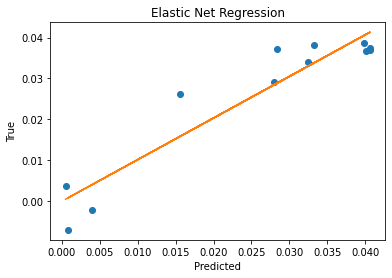

In [ ]:
plt.plot(y_test,en_reg_pred,'o')
m,b = np.polyfit(y_test,en_reg_pred,1)
plt.plot(y_test,m*y_test+b)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Elastic Net Regression")

In [ ]:
import sklearn

In [ ]:
print("MSE for Random Forest     = ",sklearn.metrics.mean_squared_error(y_test, rf_pred, squared=False))
print("MSE for Linear Regression = ",sklearn.metrics.mean_squared_error(y_test, linear_pred, squared=False))
print("MSE for LASSO Regression  = ",sklearn.metrics.mean_squared_error(y_test, lasso_pred, squared=False))
print("MSE for ElasticNet        = ",sklearn.metrics.mean_squared_error(y_test, en_reg_pred, squared=False))
print("MSE for Ridge Regression  = ",sklearn.metrics.mean_squared_error(y_test, ridge_pred, squared=False))
print("MSE for Support Vector R  = ",sklearn.metrics.mean_squared_error(y_test, svr_pred, squared=False))

MSE for Random Forest     =  0.002522923880835196
MSE for Linear Regression =  0.0052564040208381395
MSE for LASSO Regression  =  0.005828787823026436
MSE for ElasticNet        =  0.005517003053419585
MSE for Ridge Regression  =  0.005502876653488036
MSE for Support Vector R  =  0.015864963954581587


## Testing with new Data points 

In [ ]:
rf_pred = rf_regressor.predict(x_test)
rf_pred

array([0.032789  , 0.01502662, 0.035807  , 0.036949  , 0.00121255,
       0.039704  , 0.028885  , 0.044782  , 0.032849  , 0.0035376 ,
       0.036307  , 0.00117452])

In [ ]:
y_test

array([0.0324    , 0.01562244, 0.0401    , 0.0398    , 0.00089841,
       0.0406    , 0.028     , 0.0406    , 0.0284    , 0.00404276,
       0.0332    , 0.00051022])

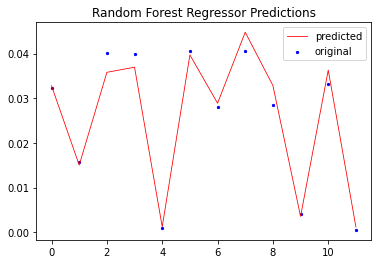

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, rf_pred, lw=0.8, color="red", label="predicted")
plt.title("Random Forest Regressor Predictions")
plt.legend()
plt.show()

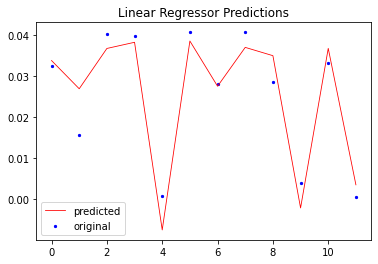

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, linear_pred, lw=0.8, color="red", label="predicted")
plt.title("Linear Regressor Predictions")
plt.legend()
plt.show()

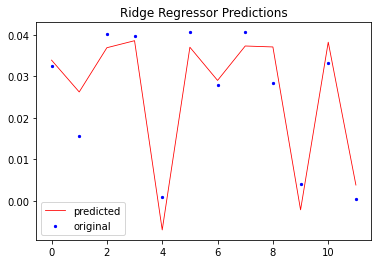

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ridge_pred, lw=0.8, color="red", label="predicted")
plt.title("Ridge Regressor Predictions")
plt.legend()
plt.show()

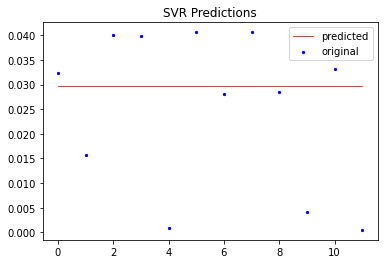

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, svr_pred, lw=0.8, color="red", label="predicted")
plt.title("SVR Predictions")
plt.legend()
plt.show()

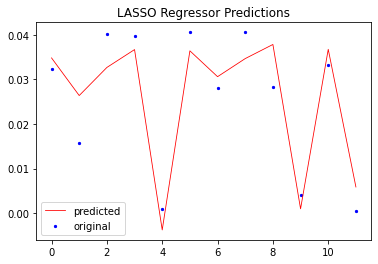

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, lasso_pred, lw=0.8, color="red", label="predicted")
plt.title("LASSO Regressor Predictions")
plt.legend()
plt.show()

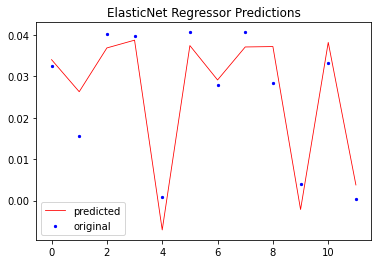

In [ ]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, en_reg_pred, lw=0.8, color="red", label="predicted")
plt.title("ElasticNet Regressor Predictions")
plt.legend()
plt.show()

In [ ]:
predictions_header = ["Actual Values","Random Forest","Linear Regression","Ridge Regression","LASSO Regression","ElasticNet Regression","SVR"]
predictions_list = []
predictions_list.append(y_test)
predictions_list.append(rf_pred)
predictions_list.append(linear_pred)
predictions_list.append(ridge_pred)
predictions_list.append(lasso_pred)
predictions_list.append(en_reg_pred)
predictions_list.append(svr_pred)

In [ ]:
prediction_df = pd.DataFrame(predictions_list,index = predictions_header)

In [ ]:
prediction_df

,0,1,2,3,4,5,6,7,8,9,10,11
Actual Values,0.032400,0.015622,0.040100,0.039800,0.000898,0.040600,0.028000,0.040600,0.028400,0.004043,0.033200,0.000510
Random Forest,0.032789,0.015027,0.035807,0.036949,0.001213,0.039704,0.028885,0.044782,0.032849,0.003538,0.036307,0.001175
Linear Regression,0.033727,0.026873,0.036662,0.038160,-0.007416,0.038469,0.027488,0.036922,0.034907,-0.002088,0.036687,0.003539
Ridge Regression,0.033889,0.026222,0.036874,0.038563,-0.006993,0.036991,0.029002,0.037288,0.037060,-0.002166,0.038213,0.003814
LASSO Regression,0.034832,0.026388,0.032695,0.036707,-0.003784,0.036425,0.030624,0.034685,0.037855,0.000948,0.036768,0.005855
ElasticNet Regression,0.033995,0.026260,0.036816,0.038689,-0.007060,0.037382,0.029096,0.037050,0.037147,-0.002145,0.038154,0.003784
SVR,0.029799,0.029799,0.029799,0.029799,0.029799,0.029799,0.029799,0.029799,0.029799,0.029799,0.029799,0.029799
